In [24]:
import pandas as pd

# Read the file, skipping the description/header lines
df = pd.read_csv(
    'summary_general.txt',
    sep='|',
    comment='#',
    skip_blank_lines=True,
    engine='python',
)

# Clean column names (remove whitespace)
df.columns = [c.strip() for c in df.columns]

# Extract the columns of interest
sky_positions = df[['GRBname', 'RA_ground', 'DEC_ground', 'Image_position_err']]

# Drop any rows with missing or invalid values (optional)
sky_positions = sky_positions.dropna()

# Save or print
print(sky_positions.head())
# sky_positions.to_csv('sky_positions.csv', index=False)


         GRBname       RA_ground       DEC_ground    Image_position_err
0  GRB241006A      3.047794e+02    -4.080480e+01       1.830146e+00    
1  GRB241002A      1.409424e+02     3.983111e+01       9.677698e-01    
2  GRB240912A      1.246227e+02     3.399498e+01       1.040790e+00    
3  GRB240905E      3.457947e+02     3.551276e+01       1.877866e+00    
4  GRB240904A      1.364422e+02    -3.051931e+01       1.782557e+00    


In [20]:
min(sky_positions['RA_ground']),max(sky_positions['RA_ground'])

(' 1.001856e+02 ', ' N/A ')

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_53125/985889913.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


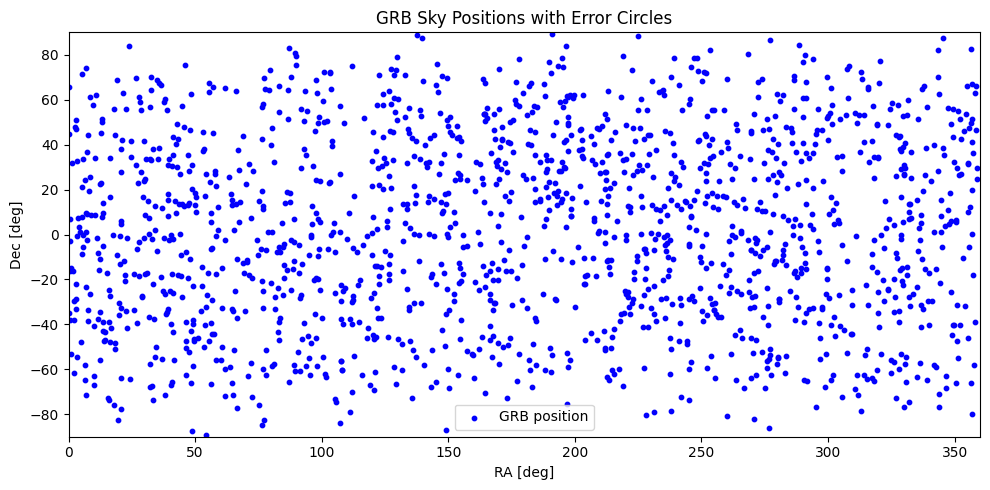

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the table from the txt file
with open('summary_general.txt') as f:
    # Find where the table starts (skip lines with #)
    lines = f.readlines()
    data_start = 0
    for i, line in enumerate(lines):
        if line.strip().startswith('GRBname'):
            data_start = i
            break

# Load the table, skipping description lines
df = pd.read_csv(
    'summary_general.txt',
    sep='|',
    skiprows=data_start,
    engine='python'
)

# Clean up column names and whitespace
df.columns = [c.strip() for c in df.columns]
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Remove any rows where RA or DEC or error is missing
for col in ['RA_ground', 'DEC_ground', 'Image_position_err']:
    df = df[df[col] != 'N/A']
df = df.dropna(subset=['RA_ground', 'DEC_ground', 'Image_position_err'])

# Convert columns to floats
df['RA_ground'] = df['RA_ground'].astype(float)
df['DEC_ground'] = df['DEC_ground'].astype(float)
df['Image_position_err'] = df['Image_position_err'].astype(float)

# Make the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Scatter plot for GRBs
ax.scatter(df['RA_ground'], df['DEC_ground'], s=10, color='blue', label='GRB position')

# Draw error circles (in arcmin) as radius
for _, row in df.iterrows():
    circle = plt.Circle(
        (row['RA_ground'], row['DEC_ground']),
        row['Image_position_err'] / 60.,  # convert arcmin to degrees for the plot
        color='red', fill=False, alpha=0.3
    )
    ax.add_patch(circle)

ax.set_xlabel('RA [deg]')
ax.set_ylabel('Dec [deg]')
ax.set_title('GRB Sky Positions with Error Circles')
ax.set_xlim(0, 360)
ax.set_ylim(-90, 90)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

def angular_distance(ra1, dec1, ra2, dec2):
    """Return the angular separation (deg) between two (RA, Dec) points."""
    ra1, dec1, ra2, dec2 = np.deg2rad([ra1, dec1, ra2, dec2])
    d_ra = ra2 - ra1
    a = np.sin((dec2-dec1)/2)**2 + np.cos(dec1)*np.cos(dec2)*np.sin(d_ra/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return np.rad2deg(c)

# Load data (see previous steps for handling header)
# ...

# Clean and convert columns
df = pd.read_csv('summary_general.txt', sep='|', skiprows=data_start, engine='python')

# Clean up column names and whitespace
df.columns = [c.strip() for c in df.columns]
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Filter out N/A
for col in ['RA_ground', 'DEC_ground', 'Image_position_err', 'Trig_time_met']:
    df = df[df[col] != 'N/A']
    df = df[df[col] != '']

df = df.dropna(subset=['RA_ground', 'DEC_ground', 'Image_position_err', 'Trig_time_met'])
# # reduce data to 10 rows for testing
# df = df.head(10)

# Convert to float
RA_ground = np.array(df['RA_ground'].astype(float))
DEC_ground = np.array(df['DEC_ground'].astype(float))
Image_position_err = np.array(df['Image_position_err'].astype(float))
trig_time_met = np.array(df['Trig_time_met'].astype(float))

position_array = np.array(list(zip(RA_ground, DEC_ground)))
    

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_53125/1052870174.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [62]:
# enumerate all in position_array
overlap_all = []
for i, pos_ in enumerate(position_array):
    # compare with all others
    idx_ = np.sqrt((position_array[:,0]-position_array[i,0])**2 + (position_array[:,1]-position_array[i,1])**2)<((Image_position_err[0] + Image_position_err[:]) / 60.)
    idx_[i] = False  # exclude self-comparison
    overlap_ = []
    for j in np.where(idx_)[0]:
        overlap_.append((i, j))
    overlap_all.extend(overlap_)

In [63]:
overlap_all

[(100, 101), (101, 100), (723, 724), (724, 723)]

In [65]:
time_diff = []
for i, idx in enumerate(overlap_all):
    time_diff.append(abs(trig_time_met[idx[0]] - trig_time_met[idx[1]]))
    

In [67]:
time_diff

[0.0, 0.0, 0.0, 0.0]